<a href="https://colab.research.google.com/github/EteimZ/Deep_Learning-Notebooks/blob/main/TensorFlow/Conv_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST 

In this notebook I will be Training a Convolutional Neural Network on the Fashion MNIST dataset. 

In [ ]:
import tensorflow as tf
from random import randint

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Setting up Hyperparameters
BATCH_SIZE = 32
EPOCHS = 30
OPTIM = 'Adam'
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Preprocessing

In [ ]:
# Downloading dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['T-shirt/top'	,'Trouser', 'Pullover','Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

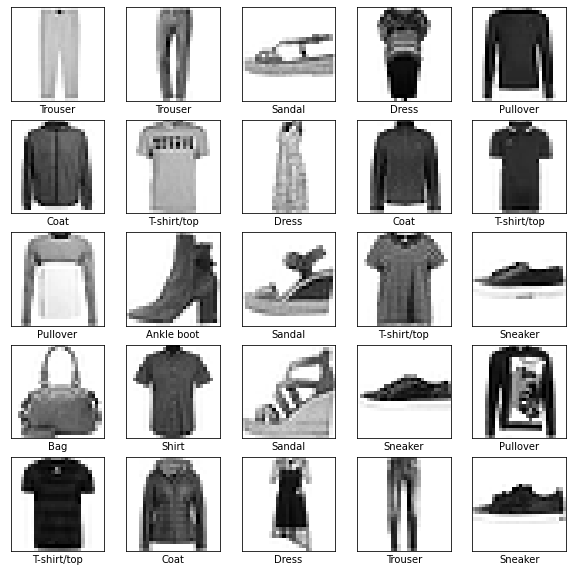

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    randnum = randint(i, len(train_images))
    plt.imshow(train_images[randnum], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[randnum]])
plt.show()

In [ ]:
# The dataset has to be reshaped to fit the ConvNet
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images  = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Model

The model has a Convolutional base with Conv and MaxPooling layers attached to a fully connected layers.

## Training Step

During Training at the end of every epoch the best model weight will be saved.<br>
[Early Stopping](https://en.wikipedia.org/wiki/Early_stopping) will be applied if the model does not improve after five Epochs.

In [ ]:
#Defining a sequential model
model = models.Sequential([
        # Conv base
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Fully Connected layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10)
      ])

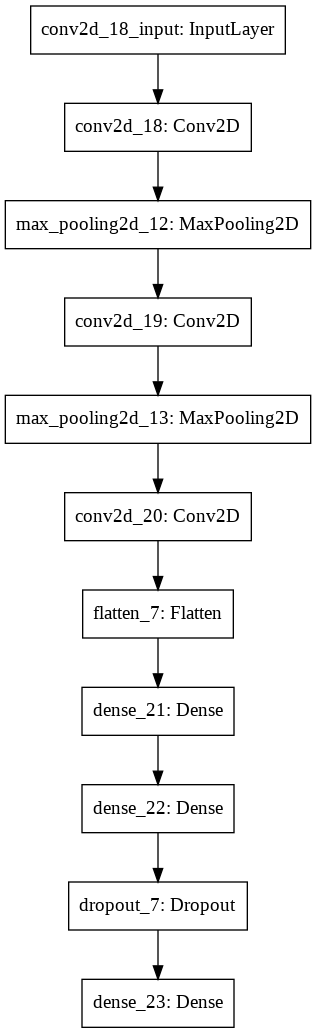

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
checkpoint_filepath = '/tmp/best_weights' # Path to save the Best Weights
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min',restore_best_weights=True)

In [ ]:
model.compile(optimizer=OPTIM,
              loss=LOSS,
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split = 0.2,callbacks=[model_checkpoint_callback, earlyStopping])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8104 - accuracy: 0.6980 - val_loss: 0.3839 - val_accuracy: 0.8583
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8670 - val_loss: 0.3125 - val_accuracy: 0.8869
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2998 - accuracy: 0.8912 - val_loss: 0.2991 - val_accuracy: 0.8906
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9006 - val_loss: 0.2715 - val_accuracy: 0.9013
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2431 - accuracy: 0.9116 - val_loss: 0.2741 - val_accuracy: 0.9006
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2201 - accuracy: 0.9188 - val_loss: 0.2690 - val_accuracy: 0.9047
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1996 - accuracy: 0.9276 - val_loss: 0.2712 - val_accuracy:

In [ ]:
model.load_weights('/tmp/best_weights') #Load the best model's weight

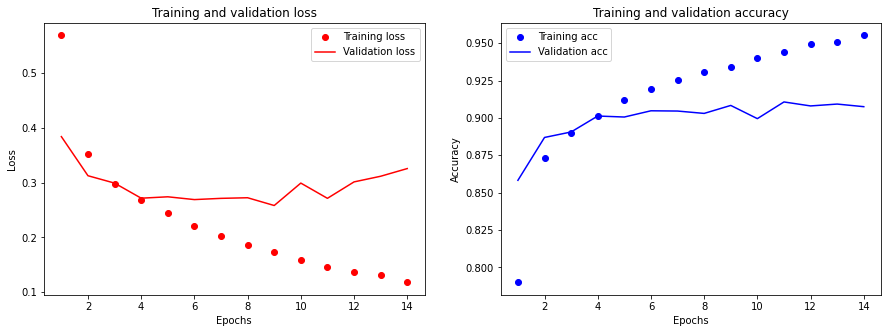

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing 



It's time to test the model on the testing dataset and see how it performs.

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9077


[0.28795525431632996, 0.9077000021934509]

We have to get our actual predictions on the test images, In other to do that a softmax layer has to be added to our model.

In [ ]:
prob_model = models.Sequential([
              model,
              layers.Softmax()
            ])

In [ ]:
#Model with softmax layer
prob_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 10)                138506    
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 138,506
Trainable params: 138,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = prob_model.predict(test_images)

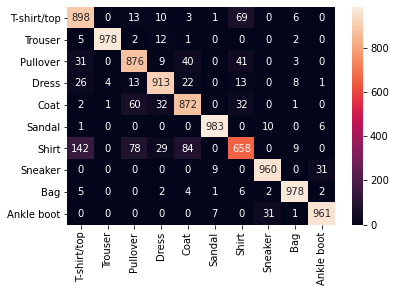

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

ax = sns.heatmap(confusion_matrix(test_labels, np.argmax(preds, axis=1)), xticklabels=class_names, yticklabels=class_names,annot=True,fmt="d")